# Previsão de Churn

***
## 2. Pré-processamento dos dados

### Objetivo:
- Limpeza dos dados
- Identificar e remover colunas que não serão utilizadas
- Tratamento de dados missing
- Processamento variáveis categóricas
- Processamento variáveis numéricas 

****
### Inputação dos dados


In [1]:
# Bibliotecas
import pandas as pd
import numpy as np

In [2]:
# Buscar dados do arquivo CSV
csv_file = "../data/01_raw/Abandono_clientes.csv"
df = pd.read_csv(csv_file)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Features:

- CustomerId: identificação do cliente;
- Surname: sobrenome do cliente;
- CreditScore: pontuação de crédito: 0=alto risco de inadimplência; 1000=baixo risco de inadimplência;
- Geography: país do cliente;
- Gender: sexo do cliente;
- Age: idade do cleinte;
- Tenure: indicativo de estabilidade no emprego. 0=pouca estabilidade; 10=muita estabilidade. 
- Balance: saldo da conta corrente;
- NumOfProducts: quantidade de produtos bancários adquiridos;
- HasCrCard: se tem cartão de credito. 1=sim; 0=não;
- IsActiveMember: se o cliente tem conta ativa. 1=ativo; 0=inativo;
- EstimatedSalary: salário estimado;
- Exited: se cliente deixou de ser cliente. 1=churn; 0=ainda cliente -> Alvo.

***
## Pré-Processamento dos dados

### 1. Remover as variáveis que não serão utilizadas

Remove variáveis que não trazem informações relevantes para descrever o Churn de clientes.

In [3]:
df1 = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


***
### 2. Tratamento de dados missing

In [4]:
# Contando número de observações faltantes no dataset para cada variável
df1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

***
### 3. Separação das variáveis

In [5]:
# Separando as variaveis independentes e dependentes
y = df1['Exited']

X = df1.copy()
X = df1.drop(columns='Exited')

X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


#### Separando as variáveis numéricas e categóricas

Tipos diferentes de variáveis passam por processamentos diferentes.

- Variáveis numéricas - contínuas ou discretas
- Variáveis categóricas - nominais ou ordinais

In [6]:
# Variáveis Continuas
x_cont = ['CreditScore', 'Balance', 'Age', 'NumOfProducts', 'EstimatedSalary', 'Tenure']
x_cont

['CreditScore', 'Balance', 'Age', 'NumOfProducts', 'EstimatedSalary', 'Tenure']

In [7]:
# Variáveis Categóricas
x_cat = list(set(X)-set(x_cont))
print(x_cat)

x_dummies = X[x_cat]
x_dummies

['HasCrCard', 'Geography', 'IsActiveMember', 'Gender']


,HasCrCard,Geography,IsActiveMember,Gender
0,1,France,1,Female
1,0,Spain,1,Female
2,1,France,0,Female
3,0,France,0,Female
4,1,Spain,1,Female
...,...,...,...,...
9995,1,France,0,Male
9996,1,France,1,Male
9997,0,France,1,Female
9998,1,Germany,0,Male


***
### 4. Processamento das variáveis categóricas

Para as variáveis categóricas com apenas duas classes utilizaremos a função Label Encoder para converter colunas categóricas em numéricas simplesmente atribuindo números inteiros a valores distintos.

In [8]:
# Substituindo os valores da variável Sexo para 0 ou 1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender']) 
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71
6,822,France,1,50,7,0.00,2,1,1,10062.80
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88
8,501,France,1,44,4,142051.07,2,0,1,74940.50
9,684,France,1,27,2,134603.88,1,1,1,71725.73


Para as variáveis categóricas com mais categorias, utilizaremos o método get_dummies(). Esse método transforma uma variável em variável dummy, ou seja, ele cria novas colunas de variáveis transformando a variável em binária, ou seja, atribui 0 e 1.

In [9]:
x_final = pd.get_dummies(data=X, columns=['Geography'])
x_final

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


***
### 5. Feature Engineering

Criação de algumas features baseadas na contidas no dataframe.

**Obs.:** Foram implementadas apenas 3, porém poderiam ser consideradas mais outras.

In [10]:
x_final['Salary_per_Age'] = x_final['EstimatedSalary'] / x_final['Age']
x_final['CreditScore_per_Products'] = x_final['CreditScore'] / x_final['NumOfProducts']
x_final['CreditScore_per_Salary'] = x_final['CreditScore'] / x_final['EstimatedSalary']


x_final

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Salary_per_Age,CreditScore_per_Products,CreditScore_per_Salary
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0,2413.068571,619.000000,0.006108
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,2744.940976,608.000000,0.005402
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,2712.656429,167.333333,0.004406
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0,2405.811026,349.500000,0.007450
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,1839.165116,850.000000,0.010748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0,2468.477949,385.500000,0.008009
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0,2905.707714,516.000000,0.005074
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0,1169.043889,709.000000,0.016847
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0,2211.631429,386.000000,0.008311


In [11]:
new_cont = ['Salary_per_Age', 'CreditScore_per_Products', 'CreditScore_per_Salary']

for var_cont in new_cont:
    x_cont.append(var_cont)

x_cont

['CreditScore',
 'Balance',
 'Age',
 'NumOfProducts',
 'EstimatedSalary',
 'Tenure',
 'Salary_per_Age',
 'CreditScore_per_Products',
 'CreditScore_per_Salary']

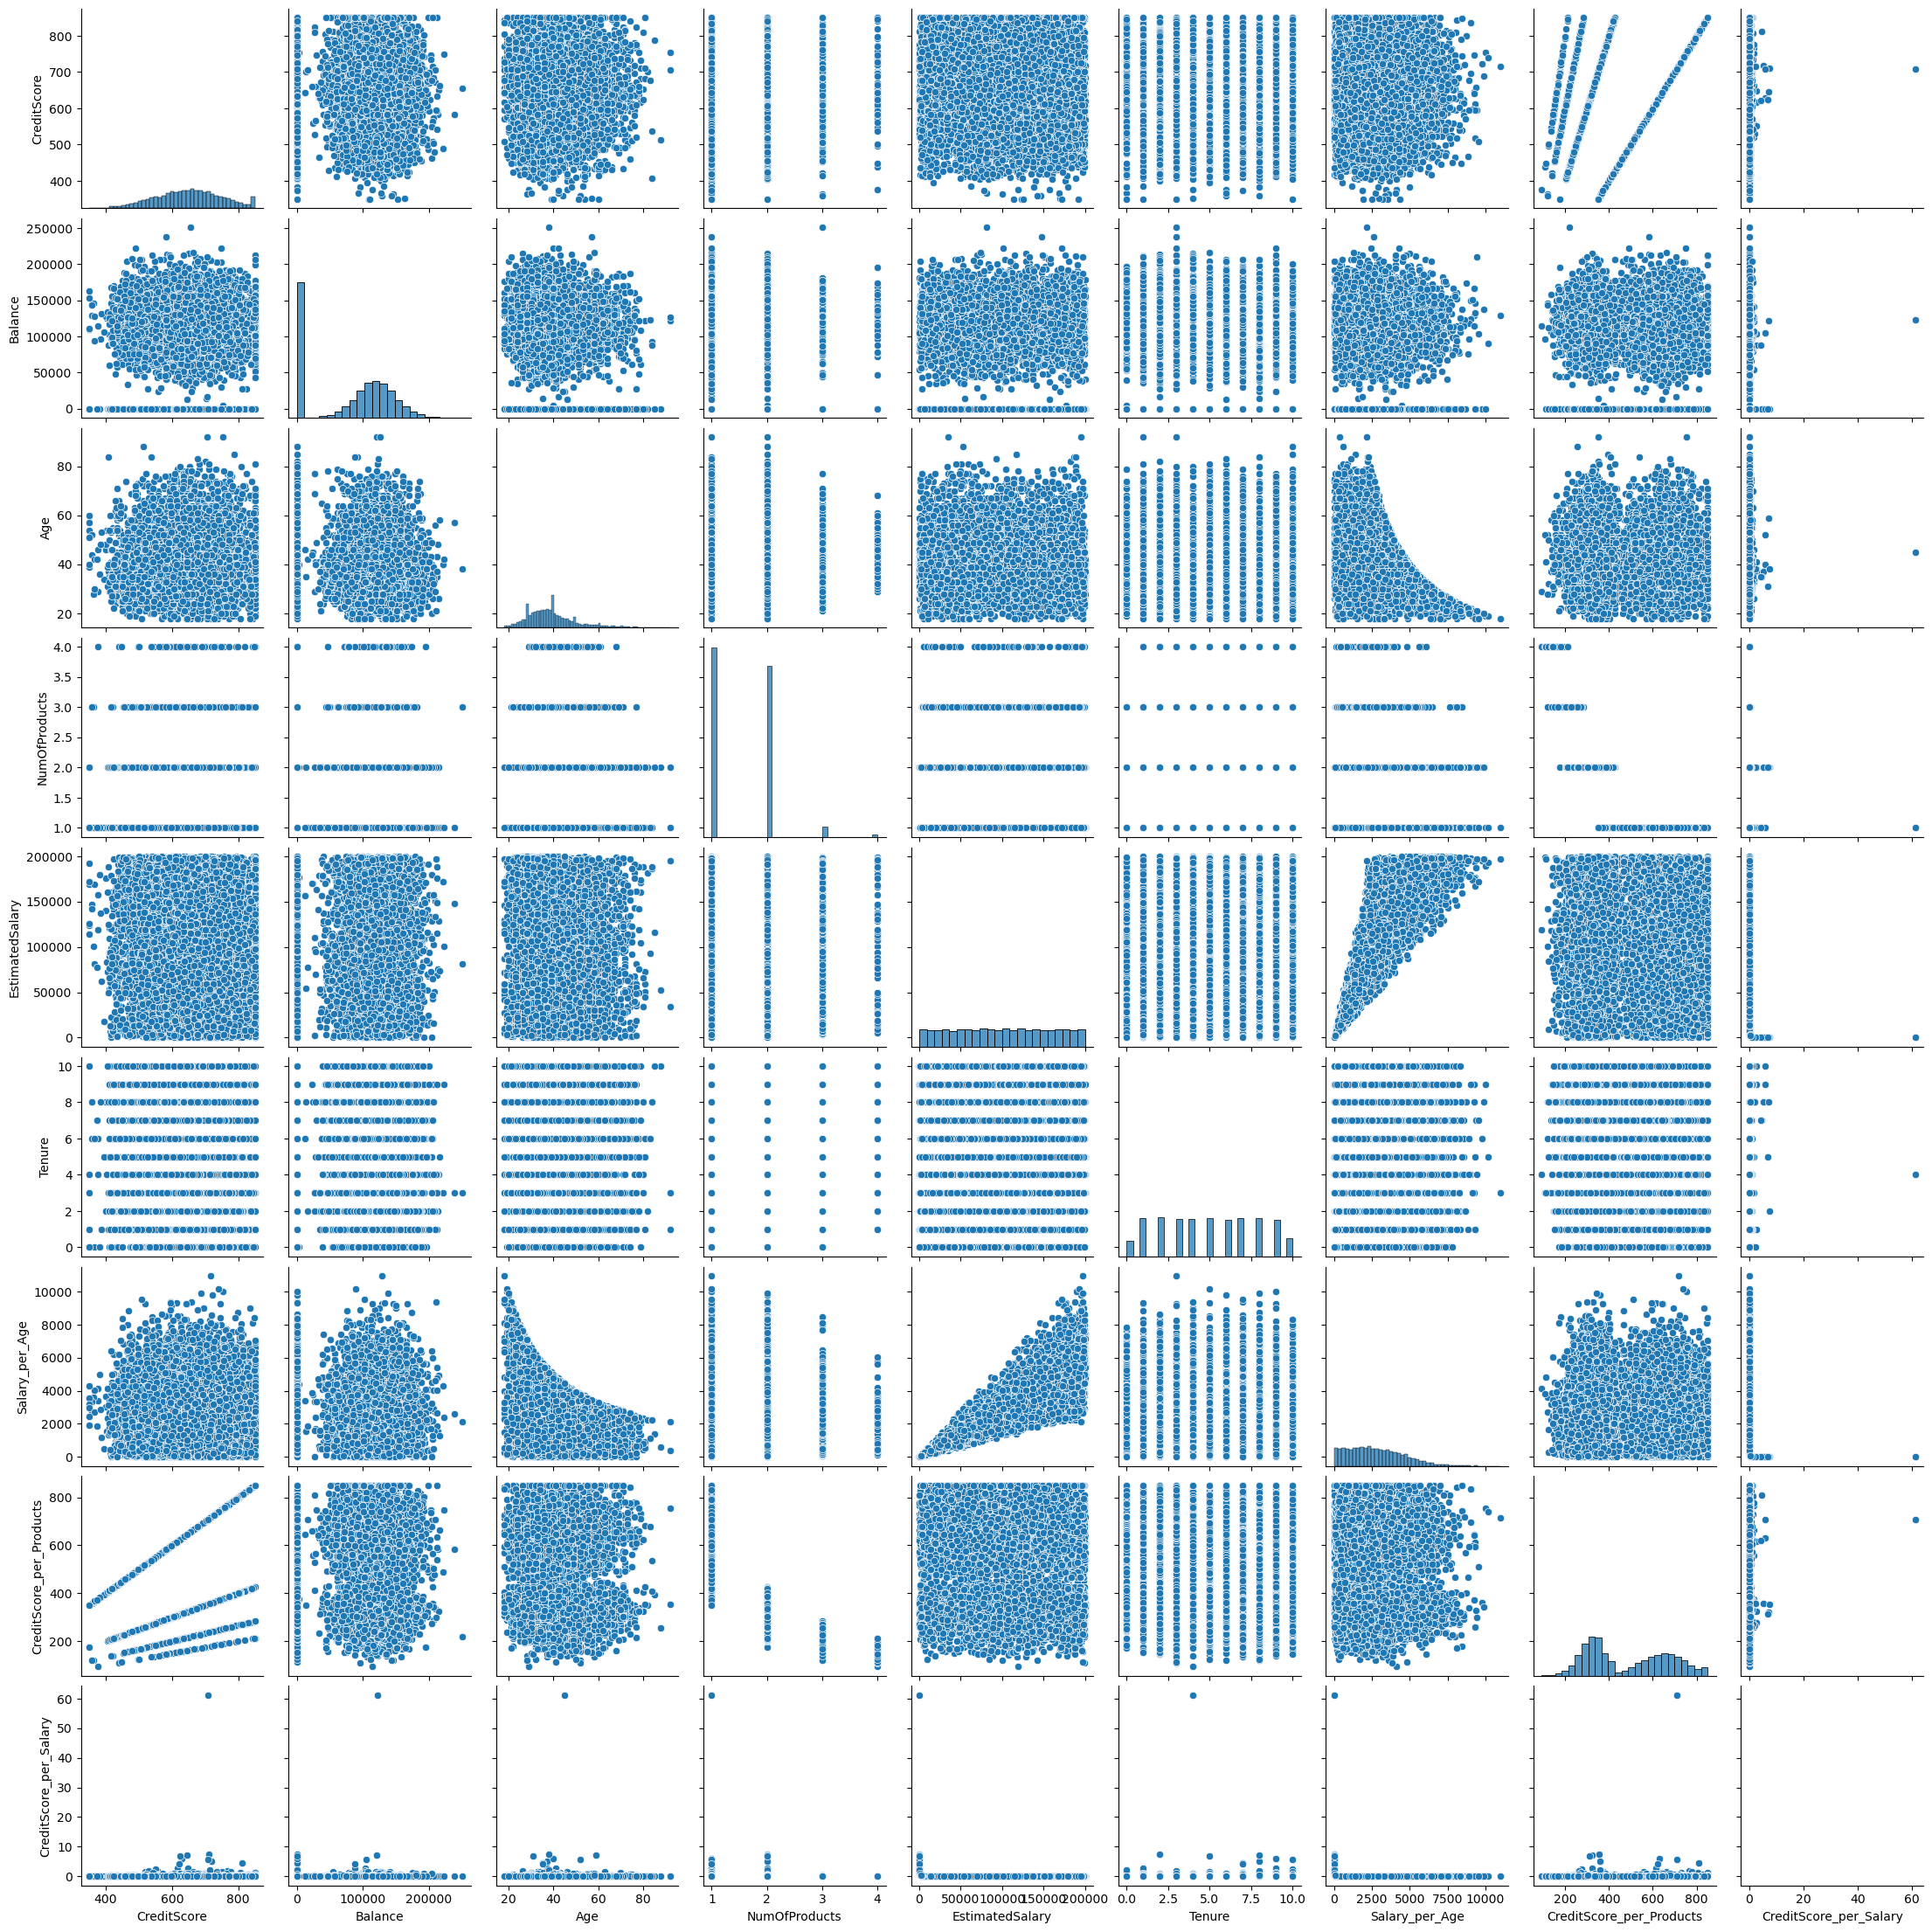

In [12]:
# # Plotando novamente a relação entre as variáveis para verificar essas novas variáveis
import seaborn as sns

sns.pairplot(x_final[x_cont]);

### 5. Variáveis Numéricas

#### Scaler

Observe que as variáveis numéricas Balance, Estimated Salary, Age e Credit Score estão em diferentes escalas e isso, a depender do algoritmo utilizado, pode causar problemas no treinamento dos modelos de Machine Learning.

Para resolver esse problemas utilizarei o método MiniMax para padronizar as variáveis contínuas, ou seja, deixarei todas as variáveis contínuas numa escala entre 0 e 1.


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_final[x_cont] = scaler.fit_transform(x_final[x_cont])
x_final[x_cont]

,CreditScore,Balance,Age,NumOfProducts,EstimatedSalary,Tenure,Salary_per_Age,CreditScore_per_Products,CreditScore_per_Salary
0,0.538,0.000000,0.324324,0.000000,0.506735,0.2,0.220105,0.694444,0.000070
1,0.516,0.334031,0.310811,0.000000,0.562709,0.1,0.250380,0.679894,0.000058
2,0.304,0.636357,0.324324,0.666667,0.569654,0.8,0.247435,0.097002,0.000042
3,0.698,0.000000,0.283784,0.333333,0.469120,0.1,0.219443,0.337963,0.000092
4,1.000,0.500246,0.337838,0.000000,0.395400,0.2,0.167752,1.000000,0.000146
...,...,...,...,...,...,...,...,...,...
9995,0.842,0.000000,0.283784,0.333333,0.481341,0.5,0.225160,0.385582,0.000101
9996,0.332,0.228657,0.229730,0.000000,0.508490,1.0,0.265045,0.558201,0.000053
9997,0.718,0.000000,0.243243,0.000000,0.210390,0.7,0.106621,0.813492,0.000245
9998,0.844,0.299226,0.324324,0.333333,0.464429,0.3,0.201729,0.386243,0.000106


In [14]:
x_final

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Salary_per_Age,CreditScore_per_Products,CreditScore_per_Salary
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,0.220105,0.694444,0.000070
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0.250380,0.679894,0.000058
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,0.247435,0.097002,0.000042
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0,0.219443,0.337963,0.000092
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0.167752,1.000000,0.000146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,1,0,0,0.225160,0.385582,0.000101
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,1,0,0,0.265045,0.558201,0.000053
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0,0.106621,0.813492,0.000245
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,0,1,0,0.201729,0.386243,0.000106


***
## Persistência dos dados após o Pré-processamento

In [15]:
df_to_save = x_final.copy()
df_to_save['Exited'] = y

df_to_save

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Salary_per_Age,CreditScore_per_Products,CreditScore_per_Salary,Exited
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,0.220105,0.694444,0.000070,1
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0.250380,0.679894,0.000058,0
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,0.247435,0.097002,0.000042,1
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0,0.219443,0.337963,0.000092,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0.167752,1.000000,0.000146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,1,0,0,0.225160,0.385582,0.000101,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,1,0,0,0.265045,0.558201,0.000053,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0,0.106621,0.813492,0.000245,1
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,0,1,0,0.201729,0.386243,0.000106,1


In [16]:
df_to_save.to_csv('../data/03_primary/data_input_model.csv', index=False)

***
### Armazena o Scaler


In [17]:
import pickle

# Salvando o modelo em um arquivo pickle
with open('../data/06_models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)